In [1]:
import numpy as np
import pickle
from PIL import Image as im
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

In [2]:
def correct_coords(value, upper_limit):
        if value <= 0: 
            value = 0
        elif value >= upper_limit: 
            value = upper_limit - 1
        
        return value

def get_sight_boundary(uav_coords):
    
     x_len = 100
     y_len = 100
     d_sight = 10
     frame_coord = set()

     for uav_coord in uav_coords:
          x_view = uav_coord[0]
          y_view = uav_coord[1]

          x_view_min = x_view - d_sight
          x_view_max = x_view + d_sight
          y_view_min = y_view - d_sight
          y_view_max = y_view + d_sight

          x_view_min = correct_coords(x_view_min, x_len)
          x_view_max = correct_coords(x_view_max, x_len)
          y_view_min = correct_coords(y_view_min, y_len)
          y_view_max = correct_coords(y_view_max, y_len)

          for y in range(y_view_min, y_view_max+1):
               frame_coord.add((x_view_min, correct_coords(y, y_len)))
          for y in range(y_view_min, y_view_max+1):
               frame_coord.add((x_view_max, correct_coords(y, y_len)))
          for x in range(x_view_min, x_view_max+1):
               frame_coord.add((correct_coords(x, x_len), y_view_min))
          for x in range(x_view_min, x_view_max+1):
               frame_coord.add((correct_coords(x, x_len), y_view_max))

     return frame_coord

In [8]:
data_path = "plot_images/figureData/"

with open(data_path + "uav_coords_ts", "rb") as f:
    uav_coords = pickle.load(f)

In [9]:
sum([len(get_sight_boundary(uav_coords[i])) for i in range(6)])

1284

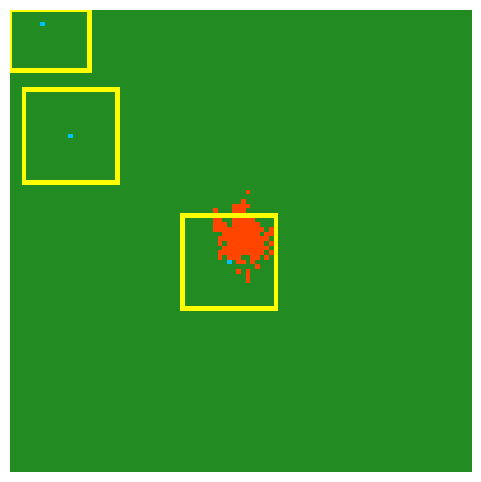

In [11]:
with open(data_path + "VDN_wildfire_timeseries", "rb") as f:
    wildfire_timeseries = pickle.load(f)

image = np.full((100,100), 0)

wildfire = wildfire_timeseries[0]

# Mark fire burning
for fx, fy in wildfire[0]:
    image[fx][fy] = 1
# Mark fire off
for fx, fy in wildfire[1]:
    image[fx][fy] = 2

for fx, fy in uav_coords[5]:
    image[fx][fy] = 3

for fx, fy in get_sight_boundary(uav_coords[5]):
    image[fx][fy] = 4

# Map data to colors
cmap = plt.cm.colors.ListedColormap(["forestgreen", "orangered","black", "deepskyblue","yellow"])

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap=cmap, vmax=4)

# Ensure the axes limits are set to show the entire image
ax.set_xlim(0, 99)
ax.set_ylim(0, 99)
ax.axis('off')  # Turn off axis numbers and ticks

# Save the figure as a PDF
# plt.savefig("wildfire_sample.pdf", bbox_inches='tight')
plt.show()
plt.close()

[  0  64 128 192 256 319]


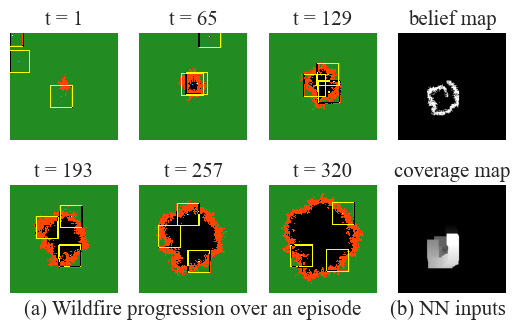

In [13]:
####################
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import seaborn as sns
import matplotlib.transforms as mtransforms
sns.set_theme(context = "notebook",style="ticks", palette='bright')
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.autolayout"] = False
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["lines.markersize"] = 8
plt.rcParams["legend.fontsize"] = 15
plt.rcParams['grid.color'] = "#949292"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
legend_properties = {'weight':'bold'}
plt.rcParams['mathtext.fontset'] = 'cm'

####################




with open(data_path + "VDN_wildfire_timeseries", "rb") as f:
    wildfire_timeseries = pickle.load(f)

plot_indices = np.arange(6) * int(320 / 5)
plot_indices[-1] -= 1
print(plot_indices)
wildfires = []
for idx in plot_indices:
     wildfires.append(wildfire_timeseries[idx])
ax_idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

fig, ax = plt.subplots(2, 4, gridspec_kw={'hspace': -0.3})
for wildfire, ax_i, plot_index in zip(wildfires, ax_idx, plot_indices):
    image = np.full((100,100), 0)

    # Mark fire burning
    for fx, fy in wildfire[0]:
        image[fx][fy] = 1
    # # Mark fire off
    for fx, fy in wildfire[1]:
        image[fx][fy] = 2

    for fx, fy in get_sight_boundary(uav_coords[plot_index]):
        image[fx][fy] = 3

    for fx, fy in uav_coords[plot_index]:
        image[fx][fy] = 4

    # Map data to colors
    cmap = plt.cm.colors.ListedColormap(["forestgreen", "orangered", "black", "yellow", "deepskyblue"])
    

    ax[ax_i[0], ax_i[1]].imshow(image, cmap=cmap, vmin=0, vmax=4)
    ax[ax_i[0], ax_i[1]].set_xlim(0, 99)
    ax[ax_i[0], ax_i[1]].set_ylim(0, 99)
    ax[ax_i[0], ax_i[1]].set_title('t = ' +str(plot_index+1))
    ax[ax_i[0], ax_i[1]].axis('off')

with open(data_path + "VDN_image_in", "rb") as f:
    image_in = pickle.load(f)[0]
ax[0, 3].imshow(image_in[0], cmap='gray', vmin=0, vmax=1)
ax[0, 3].set_xlim(0, 199)
ax[0, 3].set_ylim(0, 199)
ax[0, 3].set_title("belief map")
ax[0, 3].axis('off')

ax[1, 3].imshow(image_in[1], cmap='gray', vmin=0, vmax=255)
ax[1, 3].set_xlim(0, 199)
ax[1, 3].set_ylim(0, 199)
ax[1, 3].set_title("coverage map")
ax[1, 3].axis('off')

fig.text(0.41, 0.19, '(a) Wildfire progression over an episode', ha='center', va='center', fontsize=15)
fig.text(0.81, 0.19, '(b) NN inputs', ha='center', va='center', fontsize=15)

# fig.tight_layout()
# Save the figure as a PDF
plt.savefig("wildfire_ts.pdf", bbox_inches='tight')

plt.show()

plt.close()

/var/folders/h6/2bpy6_vs04d09qrlzp790bd00000gn/T/ipykernel_4526/2751216579.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


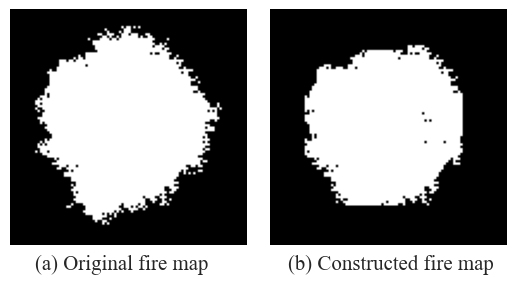

In [14]:
####################
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import seaborn as sns
import matplotlib.transforms as mtransforms
sns.set_theme(context = "notebook",style="ticks", palette='bright')
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.autolayout"] = False
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["lines.markersize"] = 8
plt.rcParams["legend.fontsize"] = 15
plt.rcParams['grid.color'] = "#949292"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
legend_properties = {'weight':'bold'}
plt.rcParams['mathtext.fontset'] = 'cm'

####################


with open(data_path + "VDN_belief_map_matrix", "rb") as f:
    belief_map = pickle.load(f)

with open(data_path + "VDN_real_fire_map_matrix", "rb") as f:
    real_fire_map = pickle.load(f)

fig, ax = plt.subplots(1, 2, gridspec_kw={'hspace': 0, 'wspace': 0.1})
ax[0].imshow(real_fire_map, cmap='gray')
ax[0].set_xlim(0, 99)
ax[0].set_ylim(0, 99)
# ax[0].set_title('Real fire map')
ax[0].axis('off')

ax[1].imshow(belief_map, cmap='gray')
ax[1].set_xlim(0, 99)
ax[1].set_ylim(0, 99)
# ax[1].set_title('Belief map')
ax[1].axis('off')

fig.text(0.30, 0.21, '(a) Original fire map', ha='center', va='center', fontsize=15)
fig.text(0.72, 0.21, '(b) Constructed fire map', ha='center', va='center', fontsize=15)

fig.tight_layout()

# Save the figure as a PDF
plt.savefig("constructed_fire_map.pdf")
plt.show()

plt.close()

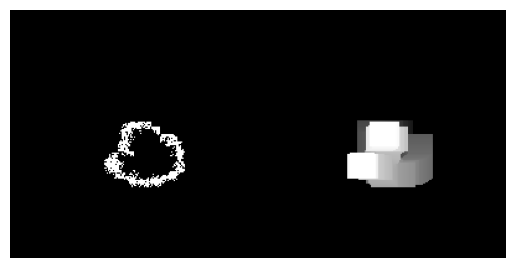

In [33]:
with open("VDN_image_in", "rb") as f:
    image_in = pickle.load(f)
    # print(image_in[0][1].shape)
    # im.fromarray(np.hstack(image_in[0]).astype(np.float32) * 255).show()
    plt.imshow(np.hstack([image_in[0][0] * 255, image_in[0][1]]).astype(np.float32), cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    # plt.savefig("coverage_map_sample.pdf", format="pdf")